In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [2]:
df = pd.read_csv('../data/processing/player_time_pure.csv')
df

,GAME_ID,GAME_DATE_EST,HOME_TEAM_ID,TEAM_ID,OPPO_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,MIN,...,pureFG3A,pureFG3_PCT,pureFTM,pureFTA,pureFT_PCT,pureDREB,pureREB,pureAST,purePTS,purePLUS_MINUS
0,42100406,6/16/2022,1610612738,1610612744,1610612738,GSW,Golden State,203952,Andrew Wiggins,2621.0,...,4.547619,0.167595,-2.702381,-3.404762,-0.588964,-1.714286,0.154762,2.357143,3.523810,9.809524
1,42100406,6/16/2022,1610612738,1610612744,1610612738,GSW,Golden State,203490,Otto Porter Jr.,783.0,...,-1.452381,0.390595,-2.702381,-3.404762,-0.588964,-3.714286,-4.845238,-2.642857,-8.476190,7.809524
2,42100406,6/16/2022,1610612738,1610612744,1610612738,GSW,Golden State,203110,Draymond Green,2509.0,...,3.476190,0.286048,-2.023810,-2.761905,-0.480238,1.642857,2.690476,5.452381,0.380952,20.976190
3,42100406,6/16/2022,1610612738,1610612744,1610612738,GSW,Golden State,202691,Klay Thompson,2478.0,...,1.678571,-0.113012,-2.238095,-2.535714,-0.540345,1.750000,0.952381,-2.273810,-4.833333,9.404762
4,42100406,6/16/2022,1610612738,1610612744,1610612738,GSW,Golden State,201939,Stephen Curry,2395.0,...,4.678571,0.181988,1.761905,1.464286,0.459655,3.750000,2.952381,2.726190,17.166667,13.404762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498535,40300101,4/17/2004,1610612754,1610612738,1610612754,BOS,Boston,2036,Chris Mihm,1315.0,...,-0.752381,-0.138290,2.085714,2.752381,0.435524,-1.114286,2.133333,-1.309524,3.876190,1.057143
498536,40300101,4/17/2004,1610612754,1610612738,1610612754,BOS,Boston,2556,Marcus Banks,707.0,...,-0.752381,-0.138290,-0.914286,-1.247619,-0.314476,-1.114286,-0.866667,-0.309524,-3.123810,-0.942857
498537,40300101,4/17/2004,1610612754,1610612738,1610612754,BOS,Boston,2599,Brandon Hunter,348.0,...,-0.752381,-0.138290,-0.914286,-1.247619,-0.314476,-2.114286,-1.866667,-1.309524,-3.123810,-10.942857
498538,40300101,4/17/2004,1610612754,1610612738,1610612754,BOS,Boston,1565,Michael Stewart,113.0,...,-0.752381,-0.138290,-0.914286,-1.247619,-0.314476,-2.114286,-2.866667,-1.309524,-5.123810,-3.942857


In [3]:
sr = pd.value_counts(df['PLAYER_ID'])
sr

2544       1576
2738       1432
2730       1391
2594       1332
101108     1329
           ... 
162777        1
1629149       1
1626219       1
1629746       1
1628996       1
Name: PLAYER_ID, Length: 2162, dtype: int64

In [4]:
sr = sr.loc[sr > 83]
sr

2544       1576
2738       1432
2730       1391
2594       1332
101108     1329
           ... 
202701       84
762          84
1629126      84
2766         84
1630194      84
Name: PLAYER_ID, Length: 1142, dtype: int64

In [5]:
sr.index

Int64Index([   2544,    2738,    2730,    2594,  101108,    2546,    1713,
             200794,    2772,  101150,
            ...
             203912,  101146, 1626273,  203123, 1627819,  202701,     762,
            1629126,    2766, 1630194],
           dtype='int64', length=1142)

In [6]:
df1 = df[df['PLAYER_ID'].isin(sr.index)]

In [7]:
sr = pd.value_counts(df1['PLAYER_ID'])
sr

2544       1576
2738       1432
2730       1391
2594       1332
101108     1329
           ... 
202701       84
1627819      84
1629126      84
762          84
2766         84
Name: PLAYER_ID, Length: 1142, dtype: int64

In [10]:
df1.sort_values(by=['PLAYER_ID', 'year', 'month', 'day'], ascending=True, inplace=True)

<ipython-input-10-1fc6e161809a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.sort_values(by=['PLAYER_ID', 'year', 'month', 'day'], ascending=True, inplace=True)


In [11]:
df1


,GAME_ID,GAME_DATE_EST,HOME_TEAM_ID,TEAM_ID,OPPO_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,MIN,...,pureFG3A,pureFG3_PCT,pureFTM,pureFTA,pureFT_PCT,pureDREB,pureREB,pureAST,purePTS,purePLUS_MINUS
497999,40300154,4/25/2004,1610612745,1610612745,1610612747,HOU,Houston,15,Eric Piatkowski,197.0,...,-0.788177,-0.144882,-1.078818,-1.453202,-0.334443,-1.083744,-1.857143,-1.098522,-5.453202,-1.837438
496391,20400025,11/5/2004,1610612741,1610612741,1610612751,CHI,Chicago,15,Eric Piatkowski,286.0,...,1.260664,-0.113043,-0.815166,-1.199052,-0.291118,-1.957346,-1.635071,-1.000000,-4.720379,-15.426540
495780,20400055,11/9/2004,1610612741,1610612741,1610612756,CHI,Chicago,15,Eric Piatkowski,597.0,...,2.975845,-0.131019,-1.091787,-1.473430,-0.372048,-2.019324,-3.004831,-0.314010,-2.077295,-5.782609
495175,20400085,11/13/2004,1610612741,1610612741,1610612746,CHI,Chicago,15,Eric Piatkowski,1196.0,...,-3.476190,-0.379298,-1.690476,-2.500000,0.399881,-1.726190,-2.464286,-3.190476,-14.809524,1.345238
494806,20400104,11/16/2004,1610612758,1610612741,1610612758,CHI,Chicago,15,Eric Piatkowski,1787.0,...,4.791667,0.383167,2.819444,2.138889,0.414750,0.166667,-0.791667,-2.194444,9.736111,1.902778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,42100142,4/19/2022,1610612756,1610612740,1610612756,NOP,New Orleans,1630529,Herbert Jones,2458.0,...,-2.865854,0.329976,-0.597561,0.707317,-0.082073,-2.390244,-3.085366,-1.390244,-2.548780,11.012195
1429,42100143,4/22/2022,1610612740,1610612740,1610612756,NOP,New Orleans,1630529,Herbert Jones,2375.0,...,-4.825000,-0.306887,-0.712500,-0.287500,0.005800,-2.700000,-1.312500,-3.637500,-4.387500,-2.900000
1274,42100144,4/24/2022,1610612740,1610612740,1610612756,NOP,New Orleans,1630529,Herbert Jones,2104.0,...,-4.750000,-0.301050,4.300000,4.662500,0.224213,-2.712500,-2.350000,-1.612500,-3.325000,12.775000
1145,42100145,4/26/2022,1610612756,1610612740,1610612756,NOP,New Orleans,1630529,Herbert Jones,2421.0,...,-2.902439,-0.012159,-1.609756,-1.292683,-0.079890,2.560976,2.853659,-4.378049,-12.597561,-4.182927


c:\users\jliu471\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


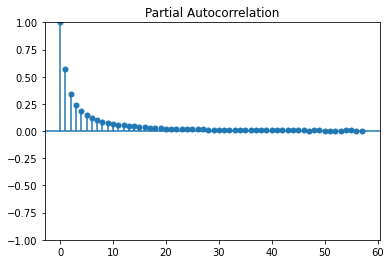

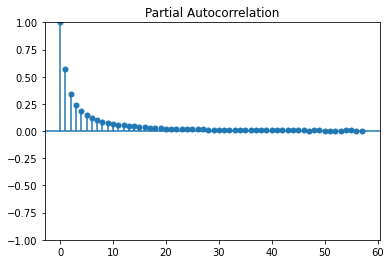

In [12]:
plot_pacf(df1['PTS'])

c:\users\jliu471\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


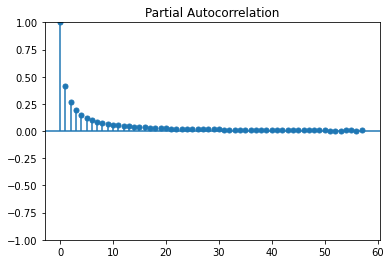

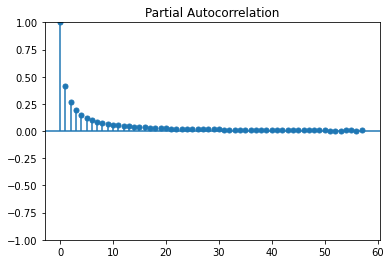

In [13]:
plot_pacf(df1['purePTS'])

c:\users\jliu471\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


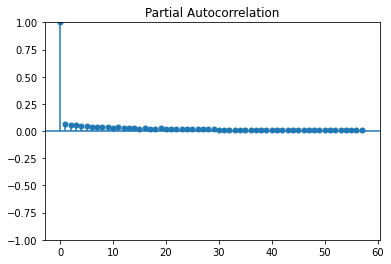

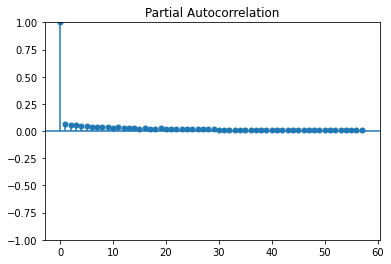

In [14]:
plot_pacf(df1['PLUS_MINUS'])

c:\users\jliu471\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


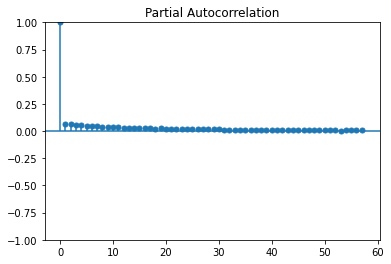

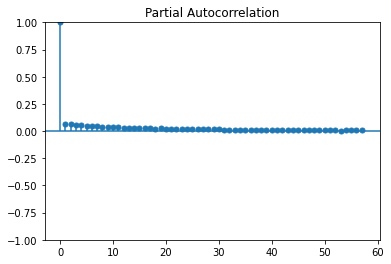

In [15]:
plot_pacf(df1['purePLUS_MINUS'])

c:\users\jliu471\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\users\jliu471\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\users\jliu471\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now b

c:\users\jliu471\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\users\jliu471\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\users\jliu471\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now b

c:\users\jliu471\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\users\jliu471\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\users\jliu471\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now b

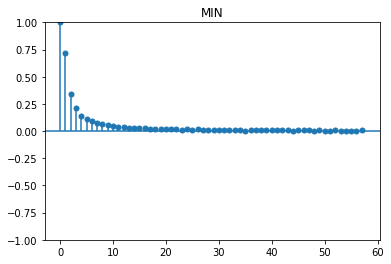

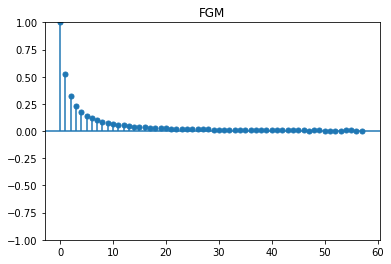

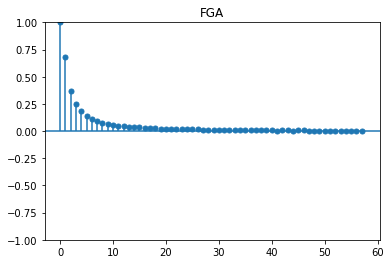

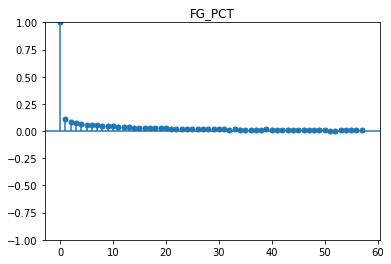

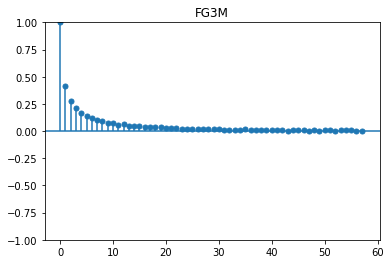

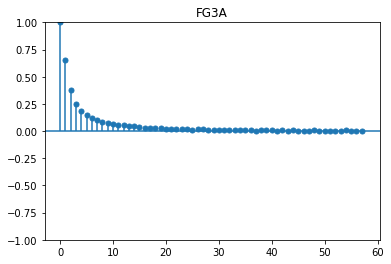

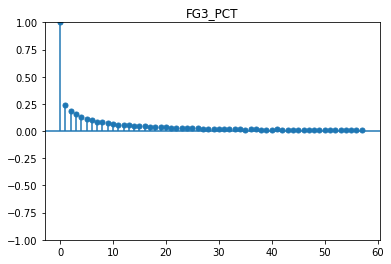

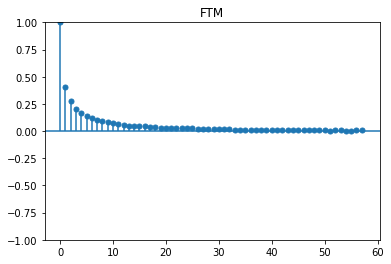

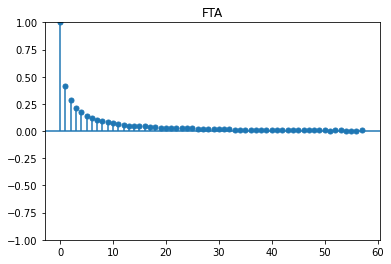

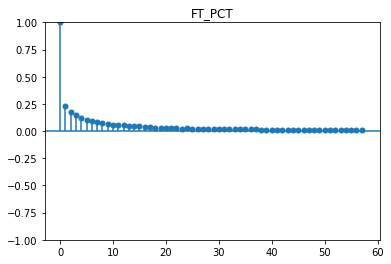

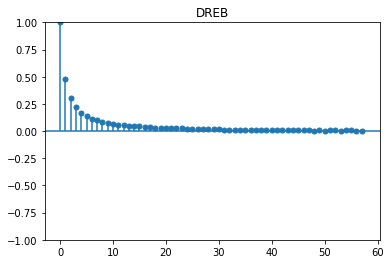

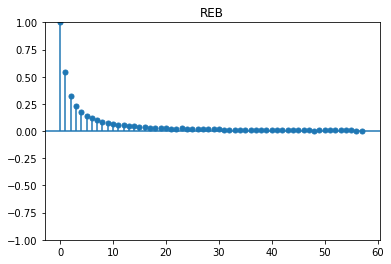

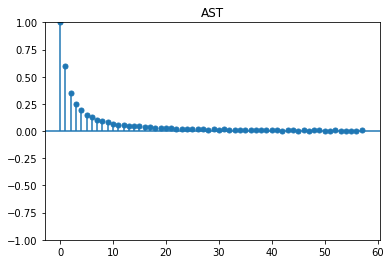

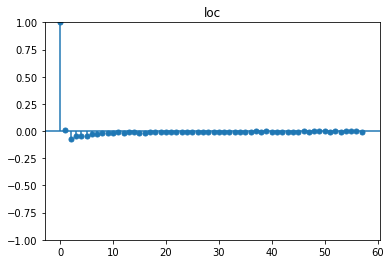

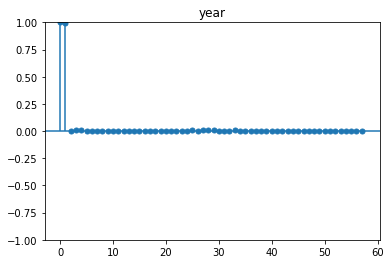

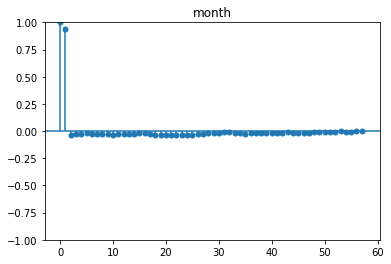

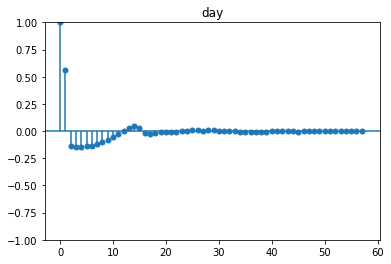

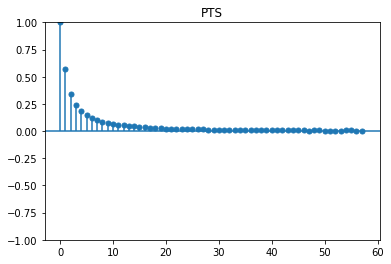

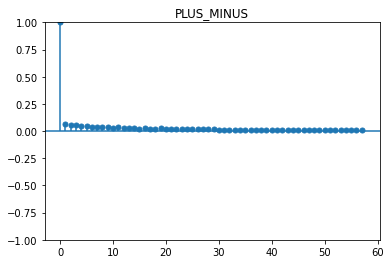

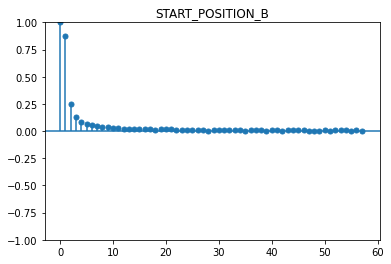

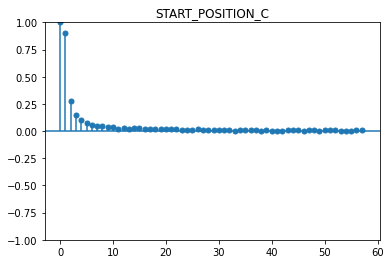

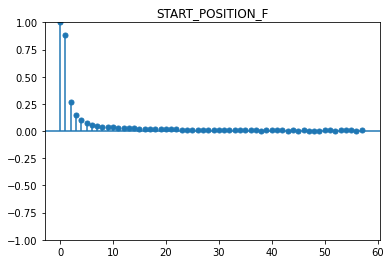

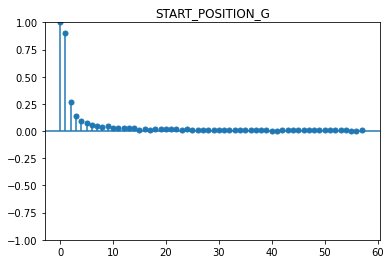

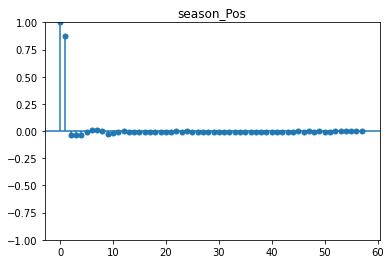

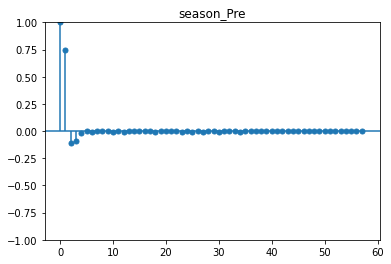

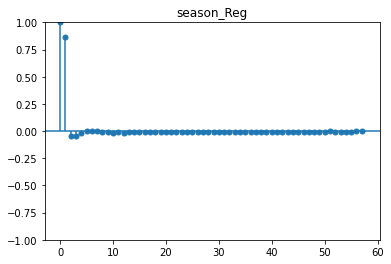

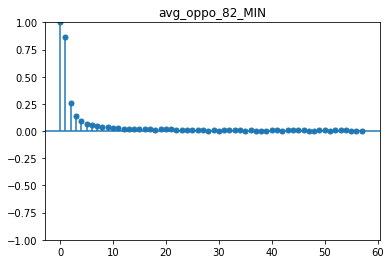

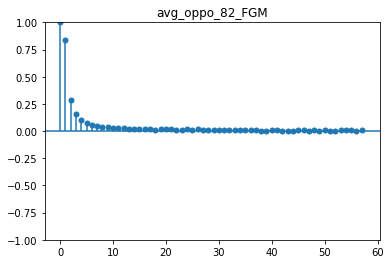

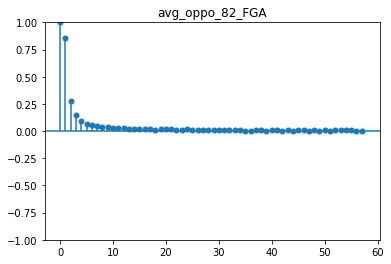

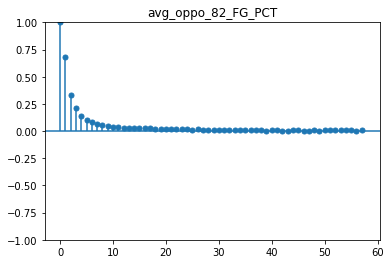

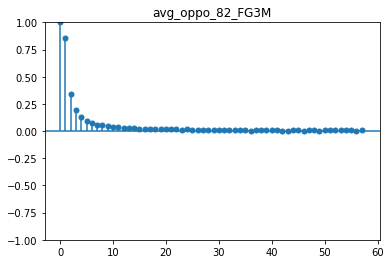

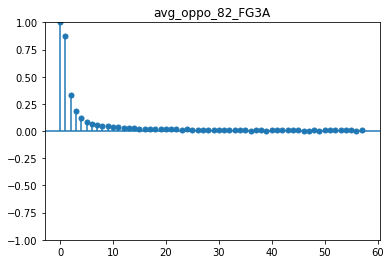

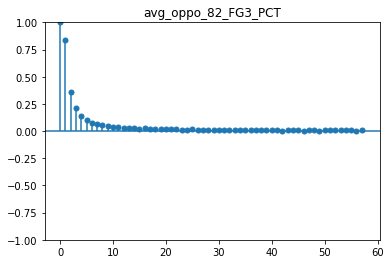

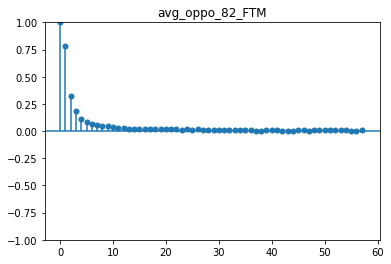

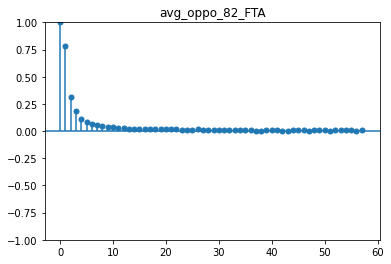

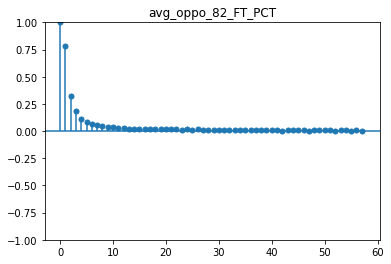

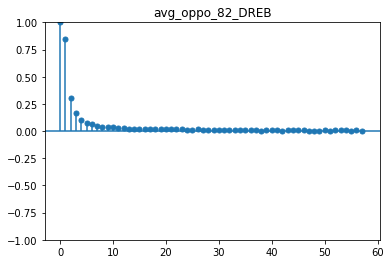

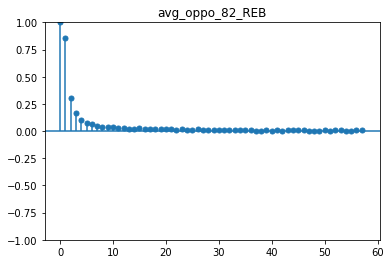

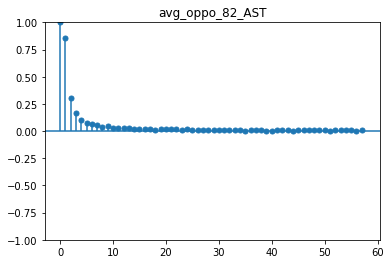

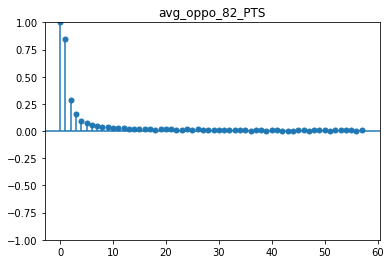

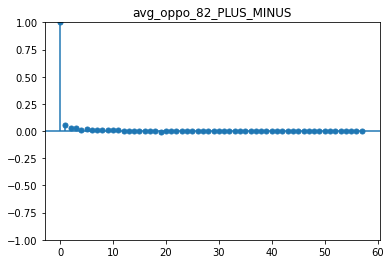

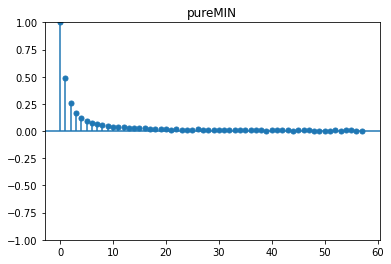

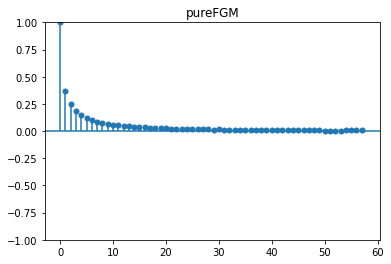

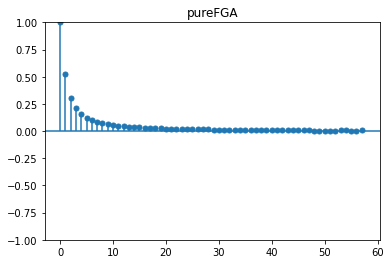

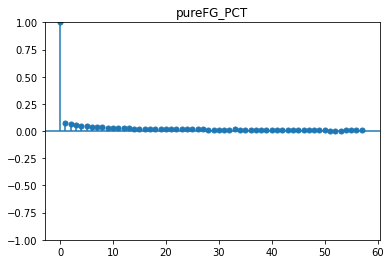

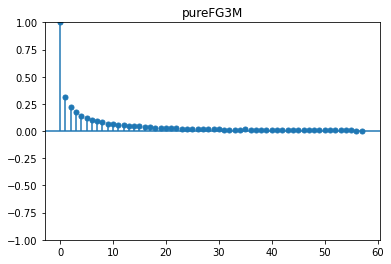

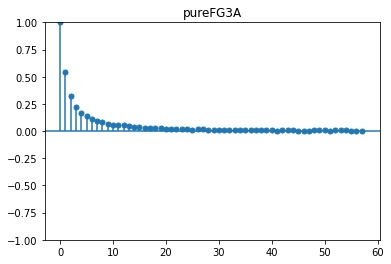

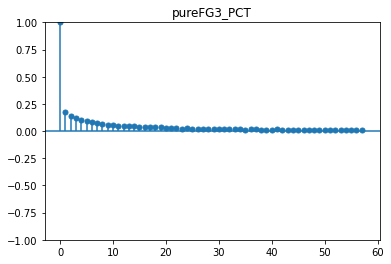

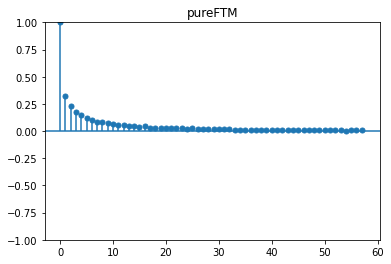

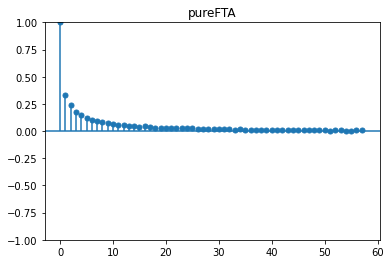

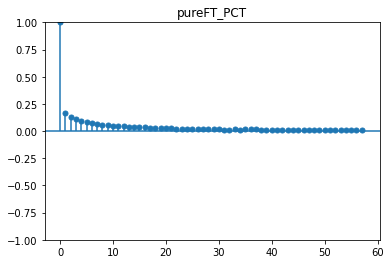

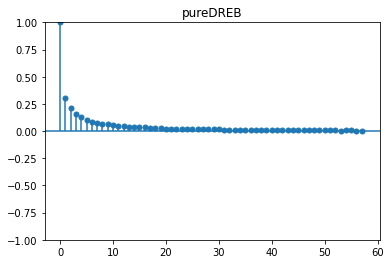

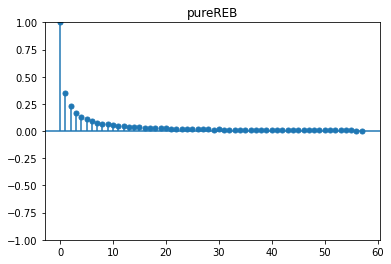

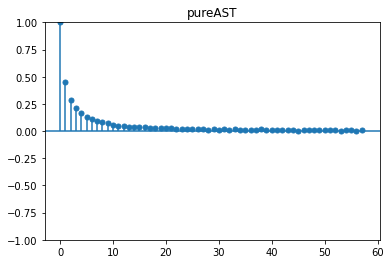

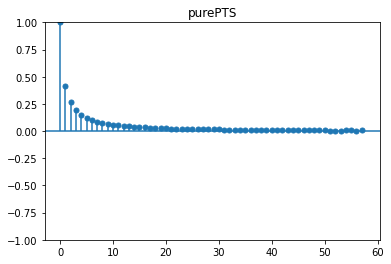

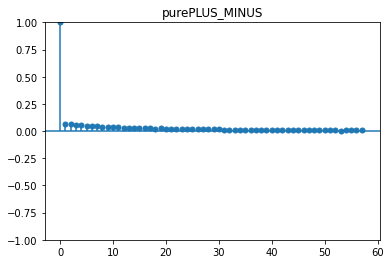

In [17]:
for col_name in df1.columns[9:]:
    plot_pacf(df1[col_name], title=col_name)  # we select 13 lags based on these PACF results.

In [33]:
df_non_time = pd.read_csv('../data/processing/non_time_PTS.csv')
df_non_time

,GAME_ID,GAME_DATE_EST,HOME_TEAM_ID,TEAM_ID,OPPO_ID,PLAYER_ID,START_POSITION,season,loc,year,month,day,PTS,PLUS_MINUS,mean_MIN,mean_FGM,mean_FGA,mean_FG_PCT,mean_FG3M,mean_FG3A,mean_FG3_PCT,mean_FTM,mean_FTA,mean_FT_PCT,mean_DREB,mean_REB,mean_AST,mean_PTS,mean_PLUS_MINUS
0,42100406,6/16/2022,1610612738,1610612744,1610612738,203952,1,3,0,2022,6,16,18,5,1970.202381,5.142857,12.226190,0.406071,1.488095,4.452381,0.276405,2.702381,3.404762,0.588964,4.714286,5.845238,2.642857,14.476190,-4.809524
1,42100406,6/16/2022,1610612738,1610612744,1610612738,203490,1,3,0,2022,6,16,6,3,1970.202381,5.142857,12.226190,0.406071,1.488095,4.452381,0.276405,2.702381,3.404762,0.588964,4.714286,5.845238,2.642857,14.476190,-4.809524
2,42100406,6/16/2022,1610612738,1610612744,1610612738,203110,2,3,0,2022,6,16,12,16,1751.857143,4.595238,8.714286,0.536857,0.404762,1.523810,0.113952,2.023810,2.761905,0.480238,6.357143,9.309524,2.547619,11.619048,-4.976190
3,42100406,6/16/2022,1610612738,1610612744,1610612738,202691,3,3,0,2022,6,16,12,4,1983.702381,6.071429,13.952381,0.426179,2.452381,6.321429,0.363012,2.238095,2.535714,0.540345,3.250000,4.047619,4.273810,16.833333,-5.404762
4,42100406,6/16/2022,1610612738,1610612744,1610612738,201939,3,3,0,2022,6,16,34,8,1983.702381,6.071429,13.952381,0.426179,2.452381,6.321429,0.363012,2.238095,2.535714,0.540345,3.250000,4.047619,4.273810,16.833333,-5.404762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498208,41200171,4/20/2013,1610612746,1610612746,1610612763,200797,4,3,1,2013,4,20,2,11,960.694690,1.995575,4.743363,0.376978,0.451327,1.349558,0.146531,0.924779,1.243363,0.283650,1.823009,2.530973,1.141593,5.367257,0.283186
498209,41200171,4/20/2013,1610612746,1610612746,1610612763,1885,4,3,1,2013,4,20,4,-8,960.694690,1.995575,4.743363,0.376978,0.451327,1.349558,0.146531,0.924779,1.243363,0.283650,1.823009,2.530973,1.141593,5.367257,0.283186
498210,41200171,4/20/2013,1610612746,1610612746,1610612763,202339,4,3,1,2013,4,20,15,12,960.694690,1.995575,4.743363,0.376978,0.451327,1.349558,0.146531,0.924779,1.243363,0.283650,1.823009,2.530973,1.141593,5.367257,0.283186
498211,41200171,4/20/2013,1610612746,1610612746,1610612763,101142,4,3,1,2013,4,20,5,6,960.694690,1.995575,4.743363,0.376978,0.451327,1.349558,0.146531,0.924779,1.243363,0.283650,1.823009,2.530973,1.141593,5.367257,0.283186


In [18]:
df_non_time_new = pd.read_csv('../data/processing/player_rolling_average.csv')
df_non_time_new

,GAME_ID,GAME_DATE_EST,HOME_TEAM_ID,TEAM_ID,OPPO_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,MIN,...,rol_avg_13_FG3A,rol_avg_13_FG3_PCT,rol_avg_13_FTM,rol_avg_13_FTA,rol_avg_13_FT_PCT,rol_avg_13_DREB,rol_avg_13_REB,rol_avg_13_AST,rol_avg_13_PTS,rol_avg_13_PLUS_MINUS
0,42100406,6/16/2022,1610612738,1610612744,1610612738,GSW,Golden State,203952,Andrew Wiggins,2621.0,...,5.071429,0.363857,1.857143,2.714286,0.634571,5.142857,7.714286,1.714286,17.285714,6.500000
1,42100406,6/16/2022,1610612738,1610612744,1610612738,GSW,Golden State,203490,Otto Porter Jr.,783.0,...,2.428571,0.361929,0.428571,0.500000,0.190500,3.071429,3.785714,1.785714,5.857143,5.785714
2,42100406,6/16/2022,1610612738,1610612744,1610612738,GSW,Golden State,203110,Draymond Green,2509.0,...,1.571429,0.107143,1.428571,2.285714,0.448643,6.214286,7.571429,5.928571,7.428571,2.428571
3,42100406,6/16/2022,1610612738,1610612744,1610612738,GSW,Golden State,202691,Klay Thompson,2478.0,...,8.714286,0.368929,1.500000,1.571429,0.571429,3.857143,4.214286,2.500000,19.071429,0.785714
4,42100406,6/16/2022,1610612738,1610612744,1610612738,GSW,Golden State,201939,Stephen Curry,2395.0,...,10.571429,0.381786,4.928571,5.714286,0.851643,5.285714,5.642857,5.928571,26.928571,5.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398883,40300152,4/19/2004,1610612747,1610612745,1610612747,HOU,Houston,2397,Yao Ming,2392.0,...,0.071429,0.000000,4.000000,4.571429,0.683357,6.714286,8.928571,1.571429,16.285714,0.071429
398884,20301187,4/14/2004,1610612757,1610612757,1610612747,POR,Portland,689,Theo Ratliff,2791.0,...,0.000000,0.000000,1.428571,2.428571,0.398857,4.500000,7.500000,0.714286,8.142857,2.000000
398885,20301187,4/14/2004,1610612757,1610612757,1610612747,POR,Portland,949,Shareef Abdur-Rahim,966.0,...,0.571429,0.178571,2.357143,2.857143,0.614857,2.214286,3.428571,1.000000,8.571429,0.000000
398886,20301170,4/12/2004,1610612757,1610612757,1610612759,POR,Portland,689,Theo Ratliff,1555.0,...,0.000000,0.000000,1.500000,2.428571,0.416714,4.642857,7.642857,0.785714,8.357143,2.571429


In [19]:
pd.set_option('display.max_rows', 110)
df_non_time_new[df_non_time_new.columns[1:]].corr()['PTS'][:]  # rol avg 13 has the highest correlation

HOME_TEAM_ID            -0.001288
TEAM_ID                 -0.004117
OPPO_ID                  0.000110
PLAYER_ID                0.004298
MIN                      0.718341
FGM                      0.958471
FGA                      0.877404
FG_PCT                   0.435170
FG3M                     0.544648
FG3A                     0.497565
FG3_PCT                  0.361011
FTM                      0.667369
FTA                      0.653551
FT_PCT                   0.498668
DREB                     0.408822
REB                      0.402243
AST                      0.409284
loc                      0.017182
year                     0.025774
month                   -0.009719
day                     -0.000632
PTS                      1.000000
PLUS_MINUS               0.210534
START_POSITION_B        -0.462138
START_POSITION_C         0.047939
START_POSITION_F         0.233441
START_POSITION_G         0.292960
season_Pos              -0.017527
season_Pre              -0.034858
season_Reg    

In [21]:
pd.set_option('display.max_rows', 110)
df_non_time_new[df_non_time_new.columns[1:]].corr()['PLUS_MINUS'][:]  # rol avg 13 has the highest correlation

HOME_TEAM_ID             0.000058
TEAM_ID                 -0.018617
OPPO_ID                  0.020248
PLAYER_ID               -0.017208
MIN                      0.119148
FGM                      0.202929
FGA                      0.098641
FG_PCT                   0.201164
FG3M                     0.162147
FG3A                     0.079938
FG3_PCT                  0.142794
FTM                      0.112742
FTA                      0.103445
FT_PCT                   0.098841
DREB                     0.177959
REB                      0.153945
AST                      0.175158
loc                      0.134782
year                     0.002602
month                    0.000694
day                     -0.000279
PTS                      0.210534
PLUS_MINUS               1.000000
START_POSITION_B        -0.037859
START_POSITION_C         0.006494
START_POSITION_F         0.019386
START_POSITION_G         0.021773
season_Pos              -0.006016
season_Pre               0.002568
season_Reg    

In [20]:
pd.set_option('display.max_columns', 110)
df_non_time_new.corr()  # 33, 23, 13 are highly correlated, we need 33 to be the features for PLUS_MINUS, no need for 13 because
                        # it is a linear combination of 13 lags.

,GAME_ID,HOME_TEAM_ID,TEAM_ID,OPPO_ID,PLAYER_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,DREB,REB,AST,loc,year,month,day,PTS,PLUS_MINUS,START_POSITION_B,START_POSITION_C,START_POSITION_F,START_POSITION_G,season_Pos,season_Pre,season_Reg,rol_avg_83_MIN,rol_avg_83_FGM,rol_avg_83_FGA,rol_avg_83_FG_PCT,rol_avg_83_FG3M,rol_avg_83_FG3A,rol_avg_83_FG3_PCT,rol_avg_83_FTM,rol_avg_83_FTA,rol_avg_83_FT_PCT,rol_avg_83_DREB,rol_avg_83_REB,rol_avg_83_AST,rol_avg_83_PTS,rol_avg_83_PLUS_MINUS,rol_avg_73_MIN,rol_avg_73_FGM,rol_avg_73_FGA,rol_avg_73_FG_PCT,rol_avg_73_FG3M,rol_avg_73_FG3A,rol_avg_73_FG3_PCT,rol_avg_73_FTM,rol_avg_73_FTA,rol_avg_73_FT_PCT,rol_avg_73_DREB,rol_avg_73_REB,rol_avg_73_AST,rol_avg_73_PTS,rol_avg_73_PLUS_MINUS,rol_avg_33_MIN,rol_avg_33_FGM,rol_avg_33_FGA,rol_avg_33_FG_PCT,rol_avg_33_FG3M,rol_avg_33_FG3A,rol_avg_33_FG3_PCT,rol_avg_33_FTM,rol_avg_33_FTA,rol_avg_33_FT_PCT,rol_avg_33_DREB,rol_avg_33_REB,rol_avg_33_AST,rol_avg_33_PTS,rol_avg_33_PLUS_MINUS,rol_avg_23_MIN,rol_avg_23_FGM,rol_avg_23_FGA,rol_avg_23_FG_PCT,rol_avg_23_FG3M,rol_avg_23_FG3A,rol_avg_23_FG3_PCT,rol_avg_23_FTM,rol_avg_23_FTA,rol_avg_23_FT_PCT,rol_avg_23_DREB,rol_avg_23_REB,rol_avg_23_AST,rol_avg_23_PTS,rol_avg_23_PLUS_MINUS,rol_avg_13_MIN,rol_avg_13_FGM,rol_avg_13_FGA,rol_avg_13_FG_PCT,rol_avg_13_FG3M,rol_avg_13_FG3A,rol_avg_13_FG3_PCT,rol_avg_13_FTM,rol_avg_13_FTA,rol_avg_13_FT_PCT,rol_avg_13_DREB,rol_avg_13_REB,rol_avg_13_AST,rol_avg_13_PTS,rol_avg_13_PLUS_MINUS
GAME_ID,1.000000,-0.042405,-0.042166,-0.044114,0.026023,0.009843,-0.008659,-0.004969,-0.026107,0.011902,0.019841,-0.003307,0.002269,0.002224,-0.018767,-0.001890,-0.002009,-0.016080,-0.001187,0.061555,-0.092992,0.064541,-0.003949,-0.006158,0.010494,-0.004482,-0.005692,-0.003666,0.955277,-0.323165,-0.655561,0.009482,0.017834,0.008778,0.037238,0.045504,0.041019,0.037055,0.006214,0.003314,0.000216,0.018557,0.009948,0.020445,0.020512,0.187349,0.009332,0.018183,0.008548,0.038229,0.045574,0.040733,0.036748,0.005486,0.002467,-0.000893,0.018415,0.009885,0.020575,0.020590,0.190832,0.002819,0.013335,0.002587,0.036187,0.040657,0.035734,0.032153,0.002806,-0.000090,-0.006216,0.013475,0.006098,0.015524,0.015797,0.178744,0.000862,0.010504,-0.000039,0.034015,0.039158,0.034140,0.031649,0.001919,-0.000765,-0.008789,0.010368,0.003683,0.012013,0.013358,0.165598,0.000622,0.006925,-0.002311,0.023337,0.035925,0.031971,0.028437,0.001826,-0.000173,-0.012565,0.008586,0.002834,0.007175,0.010374,0.141481
HOME_TEAM_ID,-0.042405,1.000000,0.480225,0.478084,-0.000802,0.000212,-0.001115,-0.002564,0.003560,-0.010053,-0.016574,0.000056,0.003742,0.003444,0.007501,-0.004586,-0.003704,-0.017163,-0.002956,-0.009977,0.009843,0.003139,-0.001288,0.000058,-0.000417,0.000704,-0.000549,0.000522,-0.045140,-0.003779,0.041241,-0.007414,-0.008842,-0.007262,-0.004267,-0.024780,-0.024571,-0.013445,-0.004165,-0.002838,-0.000468,-0.011045,-0.006541,-0.013837,-0.010752,-0.034175,-0.006730,-0.008210,-0.006556,-0.004023,-0.024238,-0.024024,-0.013082,-0.003508,-0.002138,0.000167,-0.010445,-0.005951,-0.013469,-0.010062,-0.034655,-0.004546,-0.006309,-0.004197,-0.004216,-0.021617,-0.021425,-0.011913,-0.000563,0.000517,0.003320,-0.008419,-0.004317,-0.011836,-0.007600,-0.033976,-0.003857,-0.005591,-0.003249,-0.003851,-0.020809,-0.020491,-0.011678,-0.000081,0.000932,0.003740,-0.007675,-0.003702,-0.011449,-0.006863,-0.033115,-0.002462,-0.004109,-0.001777,-0.002081,-0.019107,-0.018998,-0.010569,0.000376,0.001256,0.004349,-0.006826,-0.002824,-0.010224,-0.005473,-0.029161
TEAM_ID,-0.042166,0.480225,1.000000,-0.041157,0.002114,0.000452,-0.002052,0.000632,0.000549,-0.022565,-0.028242,-0.009403,0.003139,0.004391,0.007273,-0.006548,-0.001559,-0.012287,-0.002541,-0.007076,0.004712,0.000805,-0.004117,-0.018617,0.000172,0.000500,-0.000483,-0.000107,-0.043997,0.001044,0.037650,-0.014171,-0.015808,-0.013362,-0.004826,-0.046963,-0.047054,-0.023843,-0.008461,-0.006440,0.000285,-0.021826,-0.013450,-0.025497,-0.019847,-0.060036,-0.012758,-0.014688,-0.012118,-0.0

In [13]:
df_non_time = pd.read_csv('../data/processing/non_time.csv')
df_non_time_to19 = df_non_time[~df_non_time['GAME_DATE_EST'].str.contains('2020|2021|2022')]
df_non_time_to19

,GAME_ID,GAME_DATE_EST,HOME_TEAM_ID,TEAM_ID,OPPO_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,MIN,...,lag13_loc,lag13_PTS,lag13_PLUS_MINUS,lag13_START_POSITION_B,lag13_START_POSITION_C,lag13_START_POSITION_F,lag13_START_POSITION_G,lag13_season_Pos,lag13_season_Pre,lag13_season_Reg
68448,21900497,12/31/2019,1610612766,1610612738,1610612766,BOS,Boston,202330,Gordon Hayward,2096.0,...,1,12,-6,0,0,0,1,0,0,1
68449,21900497,12/31/2019,1610612766,1610612738,1610612766,BOS,Boston,1628369,Jayson Tatum,2175.0,...,0,26,13,0,0,1,0,0,0,1
68450,21900497,12/31/2019,1610612766,1610612738,1610612766,BOS,Boston,1628464,Daniel Theis,1351.0,...,0,2,-14,0,1,0,0,0,0,1
68451,21900497,12/31/2019,1610612766,1610612738,1610612766,BOS,Boston,203935,Marcus Smart,1829.0,...,1,17,13,0,0,0,1,0,0,1
68452,21900497,12/31/2019,1610612766,1610612738,1610612766,BOS,Boston,202689,Kemba Walker,1840.0,...,0,4,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479121,41200171,4/20/2013,1610612746,1610612746,1610612763,LAC,Los Angeles,200797,Ryan Hollins,520.0,...,1,0,-6,1,0,0,0,0,0,1
479122,41200171,4/20/2013,1610612746,1610612746,1610612763,LAC,Los Angeles,1885,Lamar Odom,1101.0,...,1,0,-13,1,0,0,0,0,0,1
479123,41200171,4/20/2013,1610612746,1610612746,1610612763,LAC,Los Angeles,202339,Eric Bledsoe,1099.0,...,1,7,-3,1,0,0,0,0,0,1
479124,41200171,4/20/2013,1610612746,1610612746,1610612763,LAC,Los Angeles,101142,Ronny Turiaf,552.0,...,0,0,-2,1,0,0,0,0,0,1


In [15]:
pd.set_option('display.max_rows', 350)
df_non_time_to19[df_non_time_to19.columns[1:]].corr()['PLUS_MINUS'][:]

HOME_TEAM_ID             -0.000036
TEAM_ID                  -0.012988
OPPO_ID                   0.013024
PLAYER_ID                -0.029328
MIN                       0.115978
FGM                       0.198894
FGA                       0.097192
FG_PCT                    0.193210
FG3M                      0.157665
FG3A                      0.080960
FG3_PCT                   0.137079
FTM                       0.116019
FTA                       0.106624
FT_PCT                    0.100604
DREB                      0.176232
REB                       0.152879
AST                       0.173579
loc                       0.139109
year                      0.000286
month                     0.001892
day                      -0.000192
PTS                       0.207003
PLUS_MINUS                1.000000
START_POSITION_B         -0.034537
START_POSITION_C          0.008031
START_POSITION_F          0.019196
START_POSITION_G          0.018172
season_Pos               -0.000805
season_Pre          